In [ ]:
!pip install ucimlrepo

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import plotly.express as px
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets
y
# metadata
print(breast_cancer_wisconsin_original.metadata)

# variable information
print(breast_cancer_wisconsin_original.variables)


{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [ ]:
df = X
df['Target'] = y


<ipython-input-4-5237ebb7172b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = y


In [ ]:
df_com_target = df.append('Target', axis=1)

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
df

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Target
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


In [ ]:
df = df.rename(columns={'Clump_thickness' : 'Grossura_do_nodulo',
                        'Uniformity_of_cell_size' : 'Uni_do_tamanho_celula',
                        'Uniformity_of_cell_shape' : 'Uni_do_formato_celula',
                        'Marginal_adhesion' : 'Adesao_marginal',
                        'Single_epithelial_cell_size' : 'Tamanho_das_celulas_epiteliais_individuais',
                        'Bare_nuclei' : 'Nucleo_nu',
                        'Bland_chromatin' : 'Cromatina_bland',
                        'Normal_nucleoli' : 'Nucleo_normal',
                        'Mitoses' : 'Mitoses'
                        })

df.head()

,Grossura_do_nodulo,Uni_do_tamanho_celula,Uni_do_formato_celula,Adesao_marginal,Tamanho_das_celulas_epiteliais_individuais,Nucleo_nu,Cromatina_bland,Nucleo_normal,Mitoses,Target
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Grossura_do_nodulo                          699 non-null    int64  
 1   Uni_do_tamanho_celula                       699 non-null    int64  
 2   Uni_do_formato_celula                       699 non-null    int64  
 3   Adesao_marginal                             699 non-null    int64  
 4   Tamanho_das_celulas_epiteliais_individuais  699 non-null    int64  
 5   Nucleo_nu                                   683 non-null    float64
 6   Cromatina_bland                             699 non-null    int64  
 7   Nucleo_normal                               699 non-null    int64  
 8   Mitoses                                     699 non-null    int64  
 9   Target                                      699 non-null    int64  
dtypes: float64(1),

In [ ]:
df.dropna(inplace =True)

In [ ]:
df.isna().sum()

,0
Grossura_do_nodulo,0
Uni_do_tamanho_celula,0
Uni_do_formato_celula,0
Adesao_marginal,0
Tamanho_das_celulas_epiteliais_individuais,0
Nucleo_nu,16
Cromatina_bland,0
Nucleo_normal,0
Mitoses,0
Target,0


In [ ]:
df

,Grossura_do_nodulo,Uni_do_tamanho_celula,Uni_do_formato_celula,Adesao_marginal,Tamanho_das_celulas_epiteliais_individuais,Nucleo_nu,Cromatina_bland,Nucleo_normal,Mitoses,Target
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


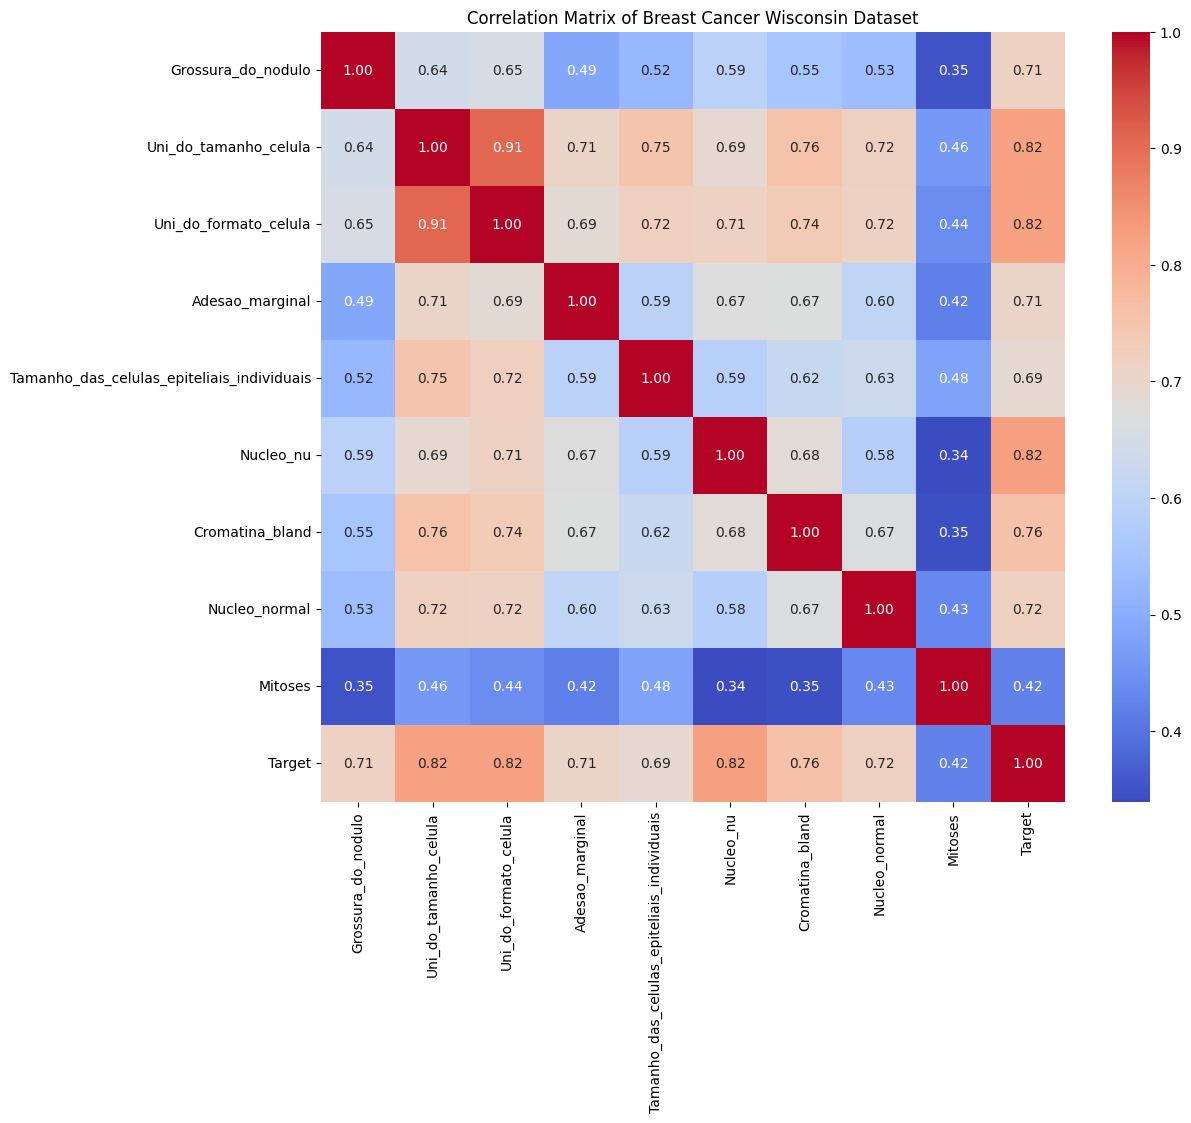

In [ ]:

correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Breast Cancer Wisconsin Dataset')
plt.show()

In [ ]:
y = df['Target']
df = df.drop(columns=['Target'])

In [ ]:
# prompt: import sklearn rf
# Importar bibliotecas necessárias
from sklearn.ensemble import RandomForestClassifier  # Modelo a ser otimizado
from sklearn.model_selection import GridSearchCV  # Ferramenta para realizar o Grid Search
from sklearn.datasets import load_iris  # Dataset de exemplo (Iris)
from sklearn.model_selection import train_test_split  # Divisão dos dados em treino e teste
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'df' and 'y' are defined from the previous code

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.4, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)  # You can adjust n_estimators


In [ ]:
rf_classifier

RandomForestClassifier(random_state=42)

In [ ]:
# Passo 3: Definir a grade de hiperparâmetros
# O dicionário contém os hiperparâmetros que queremos testar e seus respectivos valores
param_grid = {
    'n_estimators': [50, 100, 150],  # Quantidade de árvores na floresta
    'max_depth': [None, 10, 20],  # Profundidade máxima das árvores
    'min_samples_split': [2, 5, 10], # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 5, 10] # Número mínimo que tem que existir para formar uma folha
}

# Passo 4: Configurar o GridSearchCV
# Aqui, definimos o modelo, os parâmetros, e como o processo será conduzido
grid_search = GridSearchCV(
    estimator=rf_classifier,  # Modelo base
    param_grid=param_grid,  # Grade de parâmetros a testar
    cv=5,  # Número de folds para validação cruzada
    scoring='accuracy',  # Métrica usada para avaliar o desempenho
    n_jobs=-1  # Usar todos os núcleos disponíveis para paralelizar a busca
)

# Passo 5: Ajustar o modelo usando o Grid Search
# O método fit executa o grid search testando todas as combinações de parâmetros
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [ ]:
# Passo 6: Avaliar os resultados
# Exibir os melhores parâmetros encontrados pelo grid search
print("Melhores parâmetros encontrados:", grid_search.best_params_)

# Exibir a melhor pontuação obtida com a combinação ideal de parâmetros
print("Melhor pontuação (acurácia):", grid_search.best_score_)


Melhores parâmetros encontrados: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Melhor pontuação (acurácia): 0.9681722372779283


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_test, rf_classifier.predict(X_test))
train_accuracy

0.9671532846715328

In [ ]:
probab_target = rf_classifier.predict_proba(df)

In [ ]:
df['benigno'] = probab_target[:, 0]
df['maligno'] = probab_target[:, 1]

In [ ]:
df

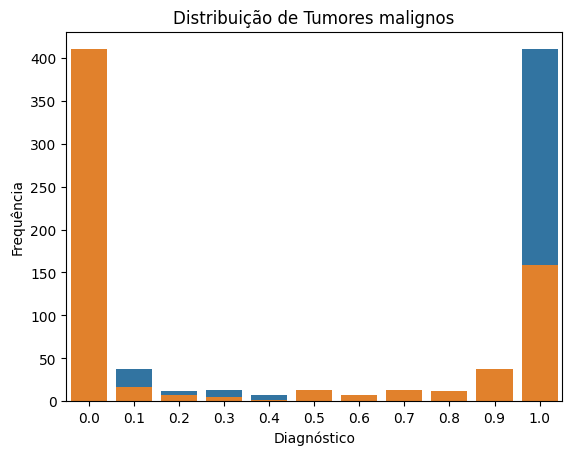

In [ ]:
sns.countplot(x='benigno', data=df)

plt.xlabel('Diagnóstico')

plt.ylabel('Frequência')

plt.title('Distribuição de Tumores Benignos')


sns.countplot(x='maligno', data=df)

plt.xlabel('Diagnóstico')

plt.ylabel('Frequência')

plt.title('Distribuição de Tumores malignos')

plt.show()
plt.show()




In [ ]:
px.histogram(df, x=['benigno', 'maligno'], title='Distribuição de Tumores', barmode='group')

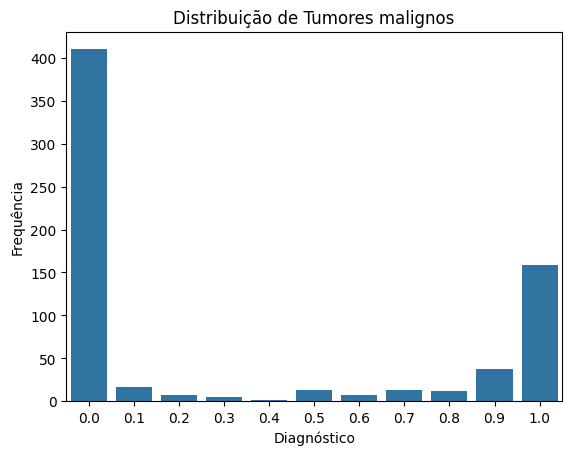

In [ ]:
sns.countplot(x='maligno', data=df)

plt.xlabel('Diagnóstico')

plt.ylabel('Frequência')

plt.title('Distribuição de Tumores malignos')

plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Grossura_do_nodulo                          683 non-null    int64  
 1   Uni_do_tamanho_celula                       683 non-null    int64  
 2   Uni_do_formato_celula                       683 non-null    int64  
 3   Adesao_marginal                             683 non-null    int64  
 4   Tamanho_das_celulas_epiteliais_individuais  683 non-null    int64  
 5   Nucleo_nu                                   683 non-null    float64
 6   Cromatina_bland                             683 non-null    int64  
 7   Nucleo_normal                               683 non-null    int64  
 8   Mitoses                                     683 non-null    int64  
 9   benigno                                     683 non-null    float64
 10  maligno            

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
cm

Confusion Matrix:


array([[172,   2],
       [ 10,  90]])

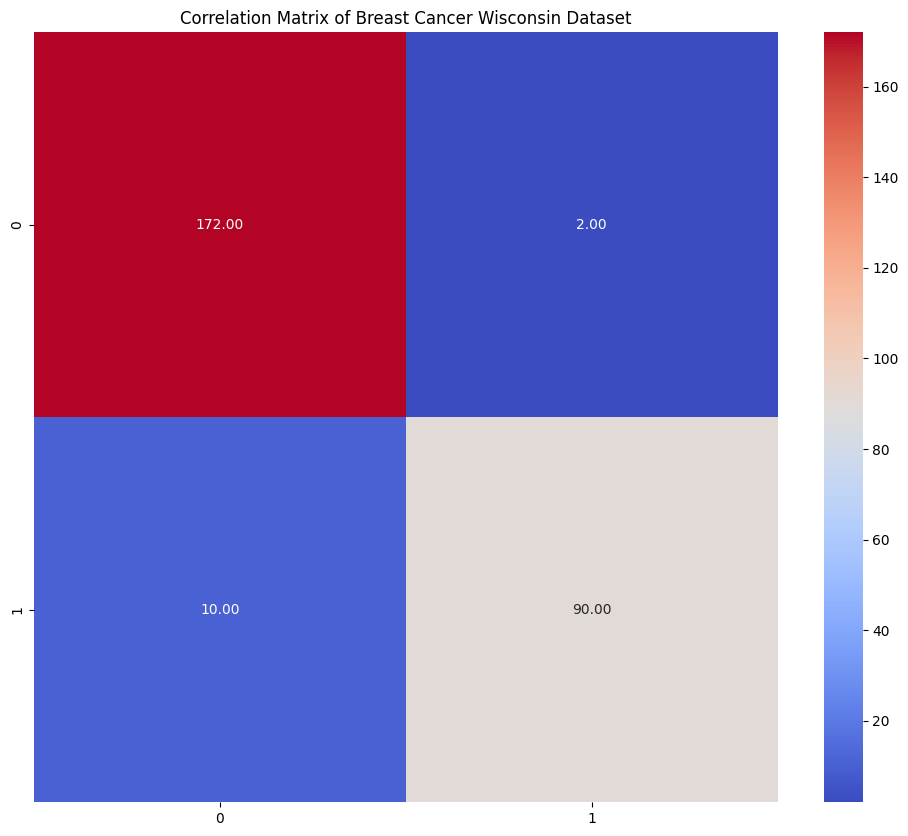

In [ ]:

correlation_matrix = cm

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Breast Cancer Wisconsin Dataset')
plt.show()

In [ ]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
cm

Accuracy: 0.9598540145985401
              precision    recall  f1-score   support

           2       0.95      0.99      0.97       174
           4       0.98      0.91      0.94       100

    accuracy                           0.96       274
   macro avg       0.96      0.95      0.96       274
weighted avg       0.96      0.96      0.96       274

Confusion Matrix:


array([[172,   2],
       [  9,  91]])

# Modelo de regressão

In [ ]:
X.dropna(inplace =True)
X

<ipython-input-44-1c293875c0ee>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Target
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
px.scatter(df, x=y_test, y=y_pred)

In [ ]:
y_pred2 = model.predict(X_test)
y_pred2_df = pd.DataFrame(y_pred2, columns=['predictions'])  # Convert to DataFrame
y_pred2_df['predictions'] = y_pred2_df['predictions'].apply(lambda x: 4 if x >= 3 else 2)

In [ ]:
y_pred2_array = y_pred2_df['predictions'].to_numpy()
px.scatter(df, x=y_test, y=y_pred2_array)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred2_df['predictions'])
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred2_df['predictions']))

cm = confusion_matrix(y_test, y_pred2_df['predictions'])
print("Confusion Matrix:")
cm

Accuracy: 0.9562043795620438
              precision    recall  f1-score   support

           2       0.95      0.99      0.97       174
           4       0.98      0.90      0.94       100

    accuracy                           0.96       274
   macro avg       0.96      0.94      0.95       274
weighted avg       0.96      0.96      0.96       274

Confusion Matrix:


array([[172,   2],
       [ 10,  90]])

In [ ]:
from matplotlib import pyplot as plt
df['Grossura_do_nodulo'].plot(kind='hist', title='Grossura_do_nodulo')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
_df_0.head()

In [ ]:
from matplotlib import pyplot as plt

for column in df.columns:
  plt.figure()  # Cria uma nova figura para cada histograma
  df[column].plot(kind='hist', title=column)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.show()  # Exibe a figura atual antes de prosseguir para a próxima coluna

In [ ]:
print(df[df.isnull().any(axis=1)])

In [ ]:
# Assuming 'df' is your dataframe
plt.hist(df['Target'])
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Distribution of Target')
plt.show()

In [ ]:
y